In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [11]:
df = pd.read_csv("customer_segmentation.csv")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [13]:
object_columns = df.select_dtypes(include=['object']).columns.tolist()
object_columns

['Education', 'Marital_Status', 'Dt_Customer']

In [14]:
df['Education'].value_counts().index.tolist()

['Graduation', 'PhD', 'Master', '2n Cycle', 'Basic']

In [15]:
def set_col_mapping(df, col_type):
    object_columns = df.select_dtypes(include=[col_type]).columns.tolist()
    print(object_columns)
    for col in object_columns:
        res = {}
        for x, value in enumerate(df[col].value_counts().index.tolist()):
            res[value] = x
        print(res)
        df[col] = df[col].map(res)

    return df


In [16]:
df = set_col_mapping(df, 'object')

['Education', 'Marital_Status', 'Dt_Customer']
{'Graduation': 0, 'PhD': 1, 'Master': 2, '2n Cycle': 3, 'Basic': 4}
{'Married': 0, 'Together': 1, 'Single': 2, 'Divorced': 3, 'Widow': 4, 'Alone': 5, 'Absurd': 6, 'YOLO': 7}
{'31-08-2012': 0, '12-09-2012': 1, '14-02-2013': 2, '12-05-2014': 3, '20-08-2013': 4, '22-05-2014': 5, '05-04-2014': 6, '23-03-2014': 7, '02-01-2013': 8, '01-03-2014': 9, '29-10-2012': 10, '29-08-2012': 11, '23-05-2014': 12, '05-04-2013': 13, '09-11-2012': 14, '28-10-2013': 15, '17-08-2012': 16, '31-08-2013': 17, '07-11-2013': 18, '11-05-2013': 19, '11-05-2014': 20, '22-08-2012': 21, '12-01-2013': 22, '23-11-2012': 23, '03-11-2012': 24, '03-06-2013': 25, '04-06-2013': 26, '30-03-2014': 27, '23-11-2013': 28, '13-04-2013': 29, '17-03-2014': 30, '04-10-2013': 31, '10-01-2013': 32, '22-05-2013': 33, '07-02-2014': 34, '02-10-2013': 35, '25-10-2013': 36, '13-02-2013': 37, '16-02-2013': 38, '07-08-2013': 39, '26-01-2014': 40, '08-08-2012': 41, '02-05-2014': 42, '16-01-2013': 

In [17]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,0,2,58138.0,0,0,224,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,0,2,46344.0,1,1,91,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,0,1,71613.0,0,0,269,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,0,1,26646.0,1,0,144,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,1,0,58293.0,1,0,321,94,173,...,5,0,0,0,0,0,0,3,11,0


<Axes: >

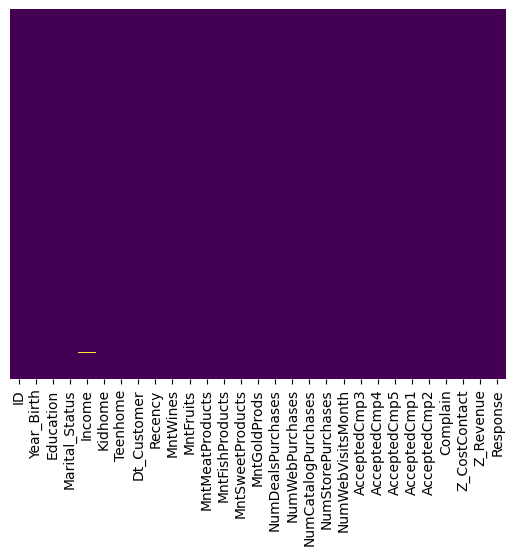

In [18]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [19]:
df.dropna(subset=['Income'], inplace=True)

<Axes: >

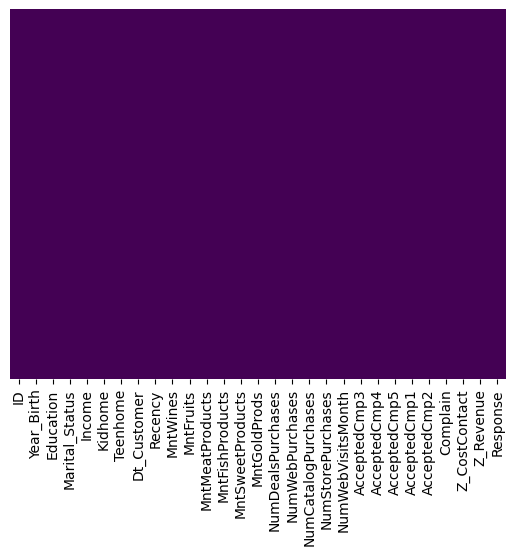

In [21]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [22]:
sc = StandardScaler()
sc.fit(df)
scaled_data = sc.transform(df)

pca = PCA(n_components=2)
pca.fit(scaled_data)
features_pca = pca.transform(scaled_data)

In [23]:
scaled_data.shape, features_pca.shape

((2216, 29), (2216, 2))

Text(0, 0.5, 'PC2')

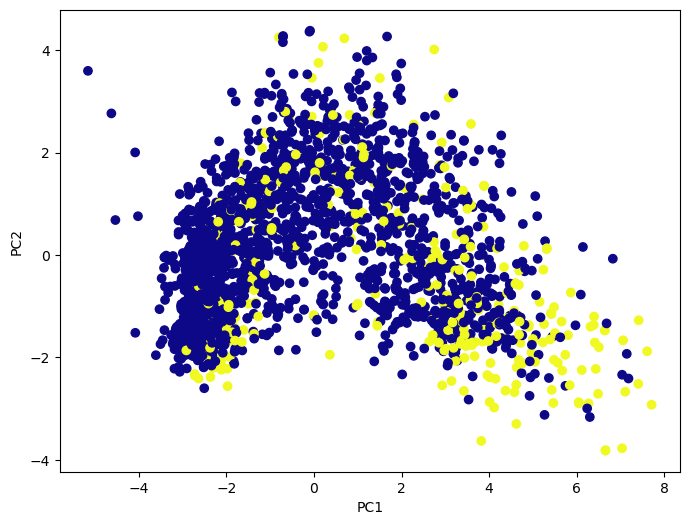

In [25]:
plt.figure(figsize=(8,6))
plt.scatter(features_pca[:,0], features_pca[:,1], c=df['Response'], cmap="plasma")
plt.xlabel("PC1")
plt.ylabel("PC2")

In [26]:
pca.components_

array([[-5.03578314e-03, -5.78141612e-02, -4.75659677e-02,
         1.67157868e-02,  2.91397385e-01, -2.55057261e-01,
        -5.60052813e-02, -1.31567936e-02,  8.86987736e-04,
         3.05493144e-01,  2.65988049e-01,  3.13945158e-01,
         2.75724326e-01,  2.68900343e-01,  2.21406633e-01,
        -5.51112628e-02,  2.11979613e-01,  3.18144530e-01,
         2.82298710e-01, -2.46651940e-01,  1.99182792e-02,
         9.58925991e-02,  1.91912747e-01,  1.71160023e-01,
         5.86120723e-02, -1.53810584e-02, -0.00000000e+00,
        -0.00000000e+00,  1.08235925e-01],
       [-2.50998011e-02, -3.40050159e-01, -7.24690958e-02,
         3.36062792e-02,  6.87695452e-02, -9.56182568e-02,
         5.38042571e-01,  3.75970217e-02,  3.95608475e-02,
         1.60499872e-01, -9.88712307e-02, -1.25283938e-01,
        -1.09496573e-01, -9.07266112e-02,  1.03314109e-01,
         4.56420119e-01,  3.55715532e-01,  1.34954840e-02,
         2.05319482e-01,  1.67261587e-01, -8.75899603e-02,
         1.13

In [27]:
df_components = pd.DataFrame(pca.components_, columns=df.columns)
df_components

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,-0.005036,-0.057814,-0.047566,0.016716,0.291397,-0.255057,-0.056005,-0.013157,0.000887,0.305493,...,-0.246652,0.019918,0.095893,0.191913,0.171160,0.058612,-0.015381,-0.0,-0.0,0.108236
1,-0.025100,-0.340050,-0.072469,0.033606,0.068770,-0.095618,0.538043,0.037597,0.039561,0.160500,...,0.167262,-0.087590,0.113621,-0.171604,-0.142882,0.002268,-0.000373,0.0,0.0,-0.115195


<Axes: >

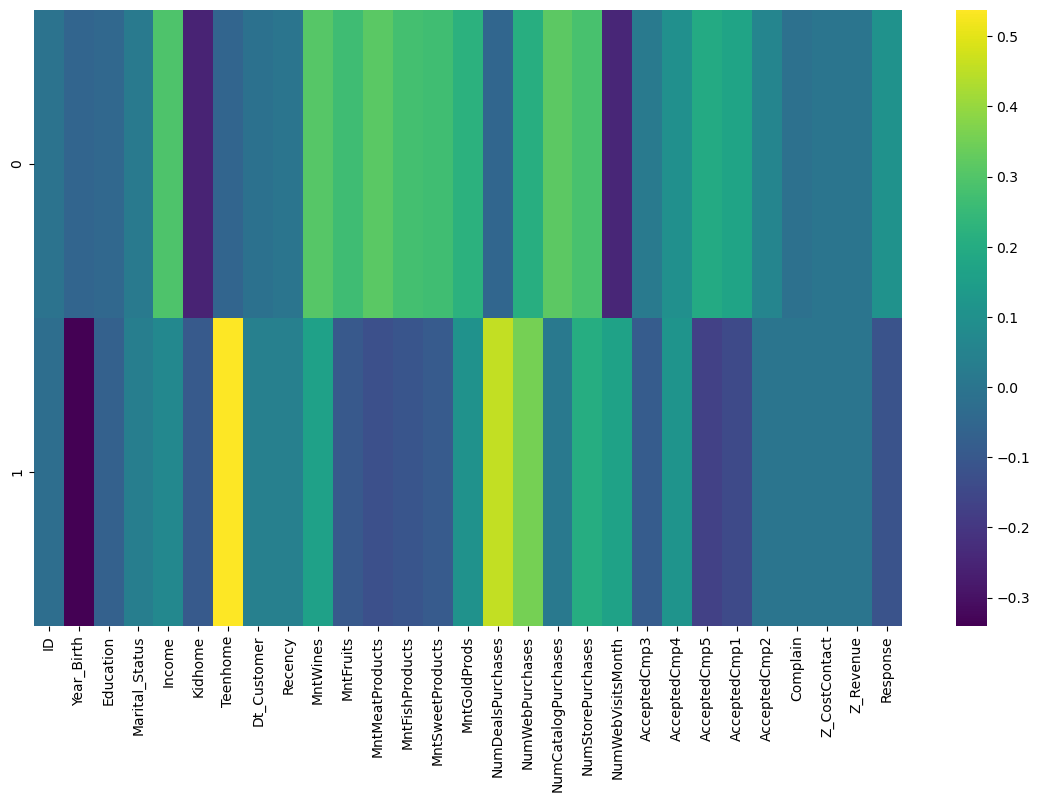

In [28]:
plt.figure(figsize=(14,8))
sns.heatmap(df_components, cmap="viridis")

In [29]:
features_pca

array([[ 3.81844185,  0.01073243],
       [-2.3111162 ,  0.30464997],
       [ 1.65101337,  0.16138078],
       ...,
       [ 1.53027935,  0.07127495],
       [ 1.69571515,  1.21851056],
       [-1.7105275 ,  0.65063272]])

In [30]:
new_useful_data = pd.DataFrame(features_pca)

In [31]:
new_useful_data

,0,1
0,3.818442,0.010732
1,-2.311116,0.304650
2,1.651013,0.161381
3,-2.476387,-1.371200
4,-0.488679,-0.162673
...,...,...
2211,2.394945,1.498514
2212,-0.983973,2.410698
2213,1.530279,0.071275
2214,1.695715,1.218511
